This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6916 - loss: 1.0530 - val_accuracy: 0.9240 - val_loss: 0.2575
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9161 - loss: 0.2716 - val_accuracy: 0.9415 - val_loss: 0.1931
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9477 - loss: 0.1670 - val_accuracy: 0.9592 - val_loss: 0.1392
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9644 - loss: 0.1167 - val_accuracy: 0.9632 - val_loss: 0.1217
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0830 - val_accuracy: 0.9644 - val_loss: 0.1250
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9817 - loss: 0.0595 - val_accuracy: 0.9647 - val_loss: 0.1244
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0460 - val_accuracy: 0.9656 - val_loss: 0.1266
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

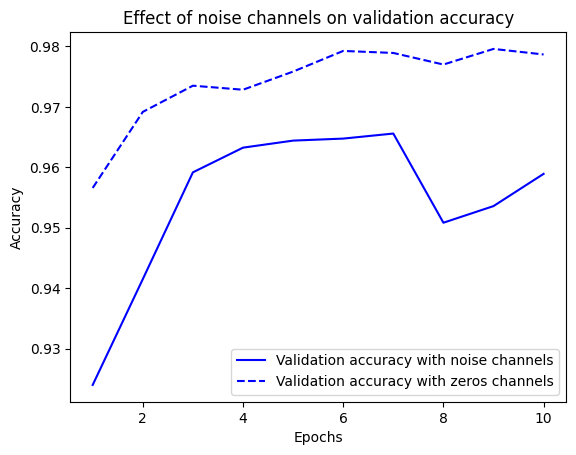

In [18]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [19]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1037 - loss: 2.3342 - val_accuracy: 0.0973 - val_loss: 2.3073
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1206 - loss: 2.2970 - val_accuracy: 0.1052 - val_loss: 2.3119
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1314 - loss: 2.2885 - val_accuracy: 0.1047 - val_loss: 2.3189
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1449 - loss: 2.2745 - val_accuracy: 0.1059 - val_loss: 2.3273
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1568 - loss: 2.2583 - val_accuracy: 0.1041 - val_loss: 2.3397
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1742 - loss: 2.2369 - val_accuracy: 0.1004 - val_loss: 2.3545
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1872 - loss: 2.2140 - val_accuracy: 0.1076 - val_loss: 2.3682
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1992 - loss: 2.1886 - val_accu

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4105 - loss: 2818.7654 - val_accuracy: 0.2453 - val_loss: 2.4472
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1791 - loss: 3.0467 - val_accuracy: 0.1698 - val_loss: 2.3044
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1950 - loss: 3.1235 - val_accuracy: 0.2085 - val_loss: 2.5062
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1945 - loss: 2.5611 - val_accuracy: 0.1606 - val_loss: 2.2110
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1866 - loss: 2.7102 - val_accuracy: 0.1354 - val_loss: 2.2974
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1563 - loss: 2.9405 - val_accuracy: 0.1587 - val_loss: 2.3550
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1468 - loss: 2.4476 - val_accuracy: 0.1692 - val_loss: 2.3455
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1484 - loss: 2.6555 - val_accuracy:

**The same model with a more appropriate learning rate**

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8343 - loss: 0.8547 - val_accuracy: 0.9542 - val_loss: 0.1573
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9638 - loss: 0.1311 - val_accuracy: 0.9583 - val_loss: 0.1640
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 0.0902 - val_accuracy: 0.9698 - val_loss: 0.1398
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9799 - loss: 0.0724 - val_accuracy: 0.9699 - val_loss: 0.1542
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9837 - loss: 0.0614 - val_accuracy: 0.9709 - val_loss: 0.1561
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9867 - loss: 0.0513 - val_accuracy: 0.9723 - val_loss: 0.1757
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9886 - loss: 0.0462 - val_accuracy: 0.9691 - val_loss: 0.1860
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9896 - loss: 0.0408 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [22]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7316 - loss: 1.0551 - val_accuracy: 0.9022 - val_loss: 0.3609
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8986 - loss: 0.3718 - val_accuracy: 0.9137 - val_loss: 0.3108
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9112 - loss: 0.3175 - val_accuracy: 0.9197 - val_loss: 0.2949
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9157 - loss: 0.3016 - val_accuracy: 0.9193 - val_loss: 0.2846
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9189 - loss: 0.2907 - val_accuracy: 0.9227 - val_loss: 0.2798
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9189 - loss: 0.2887 - val_accuracy: 0.9243 - val_loss: 0.2760
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9208 - loss: 0.2855 - val_accuracy: 0.9243 - val_loss: 0.2726
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9235 - loss: 0.2736 - val_accuracy: 0.

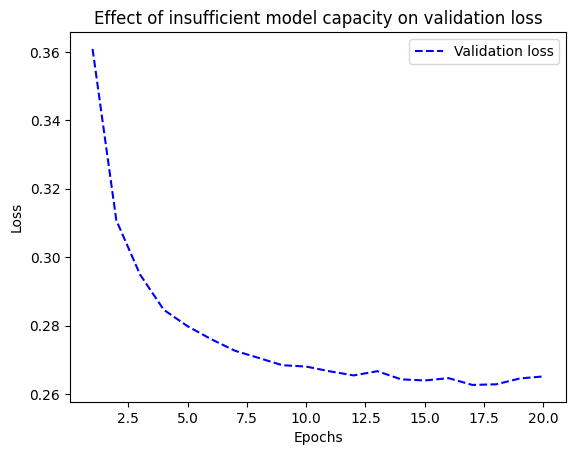

In [23]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [24]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8289 - loss: 0.6220 - val_accuracy: 0.9418 - val_loss: 0.1943
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9465 - loss: 0.1825 - val_accuracy: 0.9607 - val_loss: 0.1368
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9616 - loss: 0.1232 - val_accuracy: 0.9645 - val_loss: 0.1189
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9719 - loss: 0.0912 - val_accuracy: 0.9674 - val_loss: 0.1069
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9800 - loss: 0.0689 - val_accuracy: 0.9727 - val_loss: 0.0930
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9827 - loss: 0.0550 - val_accuracy: 0.9722 - val_loss: 0.0973
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9855 - loss: 0.0478 - val_accuracy: 0.9743 - val_loss: 0.0855
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6796 - loss: 0.6268 - val_accuracy: 0.8664 - val_loss: 0.4262
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8860 - loss: 0.3761 - val_accuracy: 0.8828 - val_loss: 0.3289
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9166 - loss: 0.2717 - val_accuracy: 0.8814 - val_loss: 0.2992
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9273 - loss: 0.2225 - val_accuracy: 0.8911 - val_loss: 0.2763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9414 - loss: 0.1786 - val_accuracy: 0.8884 - val_loss: 0.2782
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9547 - loss: 0.1514 - val_accuracy: 0.8842 - val_loss: 0.2920
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9589 - loss: 0.1316 - val_accuracy: 0.8817 - val_loss: 0.3056
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9672 - loss: 0.1119 - val_accuracy: 0.8850 - v

**Version of the model with lower capacity**

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5932 - loss: 0.6622 - val_accuracy: 0.7539 - val_loss: 0.5676
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8082 - loss: 0.5367 - val_accuracy: 0.8526 - val_loss: 0.4920
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8846 - loss: 0.4459 - val_accuracy: 0.8688 - val_loss: 0.4216
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9147 - loss: 0.3617 - val_accuracy: 0.8875 - val_loss: 0.3656
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9295 - loss: 0.2933 - val_accuracy: 0.8828 - val_loss: 0.3276
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9371 - loss: 0.2444 - val_accuracy: 0.8856 - val_loss: 0.3072
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9498 - loss: 0.2040 - val_accuracy: 0.8900 - val_loss: 0.2894
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9518 - loss: 0.1822 - val_accuracy: 0.8890 - v

**Version of the model with higher capacity**

In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6526 - loss: 0.6481 - val_accuracy: 0.8430 - val_loss: 0.3816
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8680 - loss: 0.3276 - val_accuracy: 0.8413 - val_loss: 0.3624
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9040 - loss: 0.2376 - val_accuracy: 0.8780 - val_loss: 0.2899
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9373 - loss: 0.1681 - val_accuracy: 0.7926 - val_loss: 0.5294
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9366 - loss: 0.1584 - val_accuracy: 0.8306 - val_loss: 0.4970
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9396 - loss: 0.1469 - val_accuracy: 0.8823 - val_loss: 0.3295
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9800 - loss: 0.0648 - val_accuracy: 0.8841 - val_loss: 0.3607
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9846 - loss: 0.0594 - val_accuracy: 0.8857 - v

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6903 - loss: 0.6849 - val_accuracy: 0.8190 - val_loss: 0.4989
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8900 - loss: 0.4134 - val_accuracy: 0.8870 - val_loss: 0.3804
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9237 - loss: 0.3180 - val_accuracy: 0.8863 - val_loss: 0.3644
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9313 - loss: 0.2868 - val_accuracy: 0.8899 - val_loss: 0.3529
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9411 - loss: 0.2563 - val_accuracy: 0.8763 - val_loss: 0.3753
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9355 - loss: 0.2608 - val_accuracy: 0.8870 - val_loss: 0.3588
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9482 - loss: 0.2350 - val_accuracy: 0.8860 - val_loss: 0.3637
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9550 - loss: 0.2228 - val_accuracy: 0.8853 - v

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5592 - loss: 0.6738 - val_accuracy: 0.8274 - val_loss: 0.5476
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7210 - loss: 0.5595 - val_accuracy: 0.8637 - val_loss: 0.4678
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7854 - loss: 0.4940 - val_accuracy: 0.8628 - val_loss: 0.4128
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8358 - loss: 0.4369 - val_accuracy: 0.8806 - val_loss: 0.3608
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8661 - loss: 0.3907 - val_accuracy: 0.8805 - val_loss: 0.3359
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8853 - loss: 0.3571 - val_accuracy: 0.8811 - val_loss: 0.3155
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9040 - loss: 0.3268 - val_accuracy: 0.8878 - val_loss: 0.3020
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9131 - loss: 0.3058 - val_accuracy: 0.8886 - v